<a href="https://colab.research.google.com/github/dineshnain1157/Data-Analysis-of-Telco_Customer_Churn-data/blob/main/4%EF%B8%8F%E2%83%A3Business_Insights_%26_Storytelling_(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1.Import Libraries & Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_train-data.csv")

# recreate engineered feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,0,3,34.5,0,0,7.8292,True,True,False,1
1,1,3,47.0,1,0,7.0000,False,False,True,2
2,0,2,62.0,0,0,9.6875,True,True,False,1
3,0,3,27.0,0,0,8.6625,True,False,True,1
4,1,3,22.0,1,1,12.2875,False,False,True,3


In [2]:
#2.Overall Survival Rate
survival_rate = df['Survived'].mean() * 100
survival_rate
#Only around 38% of passengers survived, highlighting the severityof the disaster and the importance of survival factors.

np.float64(36.36363636363637)

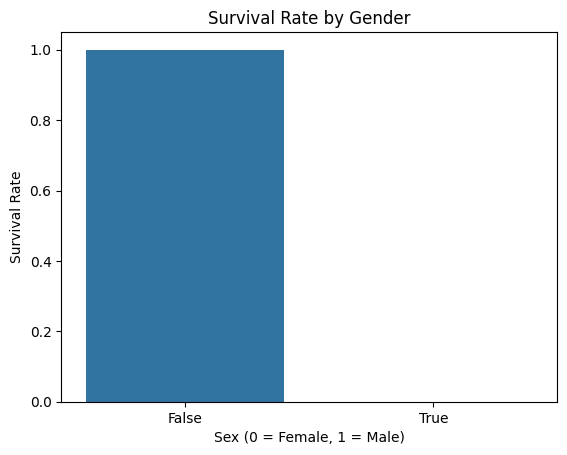

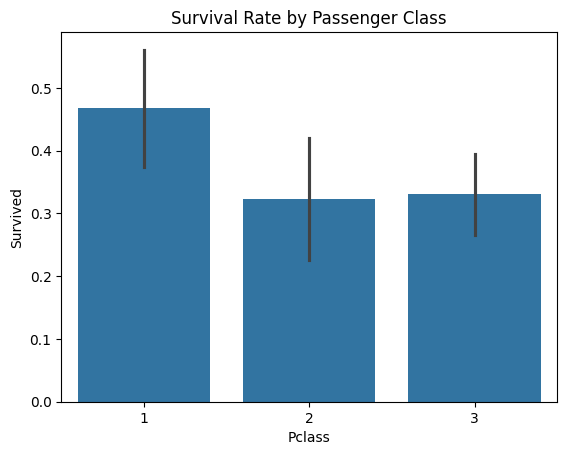

In [4]:
#3.High-Risk vs Low-Risk Groups
#🔹 Gender
df.groupby('Sex_male')['Survived'].mean()
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Survival Rate")
plt.show()

#Female passengers had a significantly higher survival rate,confirming the “women first” evacuation policy.

# 🔹 Passenger Class
df.groupby('Pclass')['Survived'].mean()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

#First-class passengers had much higher survival rates,showing the impact of socio-economic status.

/tmp/ipython-input-2553288410.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('FareGroup')['Survived'].mean()


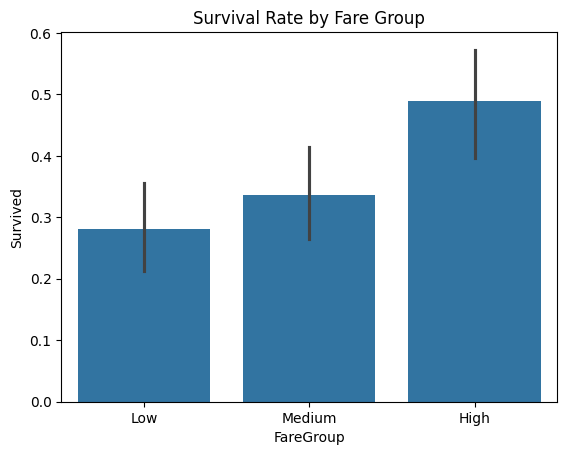

In [5]:
#4.Fare-Based Risk Segmentation
df['FareGroup'] = pd.qcut(df['Fare'], 3, labels=['Low', 'Medium', 'High'])
df.groupby('FareGroup')['Survived'].mean()
sns.barplot(x='FareGroup', y='Survived', data=df)
plt.title("Survival Rate by Fare Group")
plt.show()

#Passengers who paid higher fares had better survival chances,likely due to better cabin locations and faster evacuation.

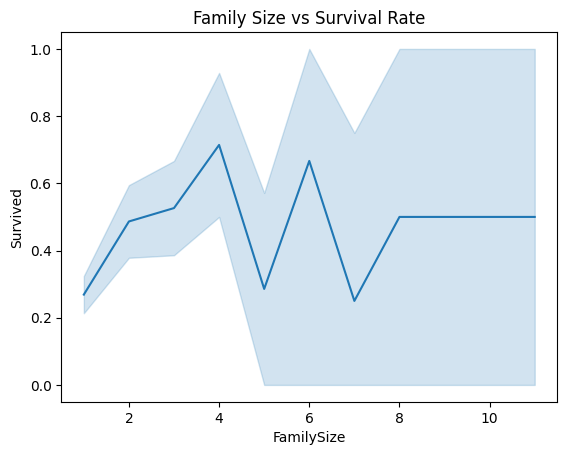

In [6]:
#5.Family Size Strategy
df.groupby('FamilySize')['Survived'].mean()
sns.lineplot(x='FamilySize', y='Survived', data=df)
plt.title("Family Size vs Survival Rate")
plt.show()

#Passengers traveling in small families had the highest survival rate,while solo travelers and very large families were at higher risk.

In [7]:
#6.High-Risk Passenger Profile
high_risk = df[
      (df['Sex_male'] == 1) &
          (df['Pclass'] == 3) &
              (df['Fare'] < df['Fare'].median())
              ]

high_risk['Survived'].mean()

#Male passengers in third class with low fares formed the highest-risk group.

np.float64(0.0)

In [8]:
#7.Business-Style Recommendations
## 🚢 Strategic Insights & Recommendations

#1. **Priority Evacuation Rules**
#- Gender and age-based prioritization significantly improves survival.
#2. **Infrastructure & Access**
#- Lower-class passengers require better access to evacuation routes.

      #3. **Ticketing & Cabin Allocation**
         #- Fairer cabin distribution can reduce survival inequality.

         #4. **Group Management**
            #- Passengers traveling in small groups should be kept together during emergencies.

In [9]:
#8.## 🧠 Final Summary
#This analysis demonstrates how data analytics can identifyhigh-risk groups during emergency scenarios.
#The findings highlight the influence of socio-economic factors,group behavior, and prioritization strategies on survival outcomes.

#Such insights can be used to design safer transportation policiesand more equitable emergency response systems.